In [30]:
import pandas as pd
import datetime
df = pd.read_csv('All_Shark_Data.csv', parse_dates=['Date'])
analytics = pd.read_csv('AllSharkAnalytical.csv')
two_cols = pd.read_csv('All_Shark_Data_2NewCols.csv')
df.rename(columns={'Eat_Total ': 'Eat_Total'}, inplace=True)
df.head(10)

import seaborn as sns
sns.set_style('darkgrid')

In [3]:
min(df.Date)

Timestamp('2017-12-05 00:00:00')

In [4]:
df2019 = df[(df.Date >= '2019-05-30') & (df.Date < '2020-01-01')]
df2019.head()



Unnamed: 0       Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  \
306         306 2019-05-30       7.0           0.0      3.0      0.0      0.0   
307         307 2019-06-01       NaN           NaN      NaN      NaN      NaN   
308         308 2019-06-02       7.0           3.0      2.0      1.0      5.0   
309         309 2019-06-04       2.0           7.0      0.0      3.0      0.0   
310         310 2019-06-06       8.0           2.0      0.0      4.0      5.0   

     Eat_BT4  Eat_BT5  Eat_GR1  ...  Garlic  Salmon  Bonito  Bluefish  Mahi  \
306      0.0      4.0      4.0  ...     1.0     1.0     0.0       0.0   0.0   
307      NaN      NaN      0.0  ...     0.0     0.0     0.0       0.0   0.0   
308      0.0      1.0      NaN  ...     1.0     0.0     0.0       0.0   0.0   
309      2.0      3.0      1.0  ...     1.0     0.0     0.0       0.0   0.0   
310      5.0      4.0      0.0  ...     1.0     0.0     0.0       0.0   0.0   

     Goggle Eye  Humbolt Squid  BT/SB Location (1-6)  GR Location (1-6)  \
306         0.0            0.0                   1.0                3.0   
307         0.0            0.0                   NaN                3.0   
308         0.0            0.0                   1.0                NaN   
309         0.0            0.0                   2.0                4.0   
310         0.0            0.0                   1.0                3.0   

                   food_combo  
306  Blue Runner_Squid_Salmon  
307                   Herring  
308                  Mackerel  
309                     Saury  
310         Blue Runner_Squid  

[5 rows x 63 columns]

In [5]:
df.at[60, 'Date'] = datetime.datetime.strptime('2018-03-22', "%Y-%m-%d")

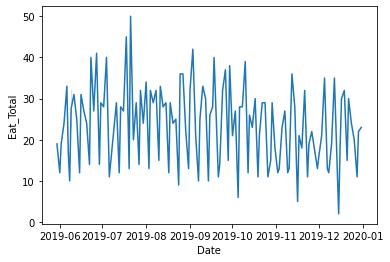

In [6]:
import seaborn as sns
ax = sns.lineplot(x=df2019.Date, y=df2019.Eat_Total, data=df2019)

In [4]:
# consolidate food combos into single column
food_combo = []
foods = ['Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring', 'Sardine',
         'Salmon', 'Bonito', 'Bluefish', 'Mahi', 'Goggle Eye', 'Humbolt Squid', 'Garlic']

for index, row in df.iterrows():
    food = ''
    
    for item in foods:
        if row[item] == 1:
            food += item + '_'
    # get rid of extra _
    food = food[0:(len(food)-1)]
            
    food_combo.append(food)

df['food_combogarlic'] = food_combo

food_combos2 = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos2 = food_combos2.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos2

food_combo  counts
0                          Mackerel     144
1                           Herring     122
2                             Saury     119
3                 Blue Runner_Squid      77
4                      Saury_Salmon      28
5                       Blue Runner      22
6          Blue Runner_Squid_Salmon       9
7            Blue Runner_Squid_Mahi       6
8          Blue Runner_Squid_Bonito       6
9                     Squid_Herring       5
10                            Squid       5
11                 Mackerel_Herring       4
12       Blue Runner_Squid_Bluefish       3
13               Herring_Goggle Eye       3
14                   Saury_Mackerel       2
15               Blue Runner_Salmon       2
16                   Squid_Bluefish       2
17                           Salmon       2
18     Blue Runner_Squid_Goggle Eye       2
19                      Saury_Squid       2
20       Squid_Bonito_Humbolt Squid       1
21           Squid_Herring_Bluefish       1
22              Squid_Humbolt Squid       1
23                     Squid_Bonito       1
24           Squid_Mackerel_Herring       1
25                   Squid_Mackerel       1
26                             Mahi       1
27                    Saury_Herring       1
28         Saury_Blue Runner_Salmon       1
29      Salmon_Bonito_Humbolt Squid       1
30         Salmon_Bonito_Goggle Eye       1
31             Blue Runner_Bluefish       1
32                    Mackerel_Mahi       1
33                   Herring_Bonito       1
34                           Bonito       1
35                         Bluefish       1
36       Blue Runner_Squid_Mackerel       1
37  Blue Runner_Squid_Bluefish_Mahi       1
38               Blue Runner_Bonito       1
39     Squid_Mackerel_Humbolt Squid       1

In [2]:
food_combos = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos = food_combos.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos

food_combo  counts
0                          Mackerel     144
1                           Herring     122
2                             Saury     119
3                 Blue Runner_Squid      77
4                      Saury_Salmon      28
5                       Blue Runner      22
6          Blue Runner_Squid_Salmon       9
7            Blue Runner_Squid_Mahi       6
8          Blue Runner_Squid_Bonito       6
9                     Squid_Herring       5
10                            Squid       5
11                 Mackerel_Herring       4
12       Blue Runner_Squid_Bluefish       3
13               Herring_Goggle Eye       3
14                   Saury_Mackerel       2
15               Blue Runner_Salmon       2
16                   Squid_Bluefish       2
17                           Salmon       2
18     Blue Runner_Squid_Goggle Eye       2
19                      Saury_Squid       2
20       Squid_Bonito_Humbolt Squid       1
21           Squid_Herring_Bluefish       1
22              Squid_Humbolt Squid       1
23                     Squid_Bonito       1
24           Squid_Mackerel_Herring       1
25                   Squid_Mackerel       1
26                             Mahi       1
27                    Saury_Herring       1
28         Saury_Blue Runner_Salmon       1
29      Salmon_Bonito_Humbolt Squid       1
30         Salmon_Bonito_Goggle Eye       1
31             Blue Runner_Bluefish       1
32                    Mackerel_Mahi       1
33                   Herring_Bonito       1
34                           Bonito       1
35                         Bluefish       1
36       Blue Runner_Squid_Mackerel       1
37  Blue Runner_Squid_Bluefish_Mahi       1
38               Blue Runner_Bonito       1
39     Squid_Mackerel_Humbolt Squid       1

In [21]:
df.to_csv('./All_Shark_Data.csv')

In [9]:
analytics
for col in analytics.columns:
    print(col)

Unnamed: 0
Date
Eat_Total
AvgPiecesPerShark
Drop_Total
AvgDropsPerShark
Target_Total
AvgTargetsPerShark
SharkCount
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
food_combo


In [10]:
for col in two_cols.columns:
    print(col)

Unnamed: 0
Date
Week_Day
Eat_Ross
Eat_Chandler
Eat_BT1
Eat_BT2
Eat_BT3
Eat_BT4
Eat_BT5
Eat_GR1
Eat_GR2
Eat_GR3
Eat_GR4
Eat_GR5
Eat_Total
SharkCount
AvgPiecesPerShark
Drop_Ross
Drop_Chandler
Drop_BT1
Drop_BT2
Drop_BT3
Drop_BT4
Drop_BT5
Drop_GR1
Drop_GR2
Drop_GR3
Drop_GR4
Drop_GR5
Drop_Total
AvgDropsPerShark
Target_Ross
Target_Chandler
Target_BT1
Target_BT2
Target_BT3
Target_BT4
Target_BT5
Target_GR1
Target_GR2
Target_GR3
Target_GR4
Target_GR5
Target_Total
AvgTargetsPerShark
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
BT/SB Location (1-6)
GR Location (1-6)
food_combo
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71


In [6]:
import warnings
warnings.filterwarnings('ignore')

eats = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).sum().reset_index()
counts = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).count().reset_index().rename(columns={'Eat_Total':'counts'})
targets = df[['food_combo', 'Target_Total']].groupby(['food_combo']).sum().reset_index()
drops = df[['food_combo', 'Drop_Total']].groupby(['food_combo']).sum().reset_index()
garlic = df[['food_combo', 'Garlic']].groupby(['food_combo']).sum().reset_index()
vitamins = df[['food_combo', 'Mazuri Vitamins']].groupby(['food_combo']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_pct'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj = counts[0:11]
counts_adj['eat_target_pct'] = round(counts_adj.eat_totals / counts_adj.target_total, 2)
counts_adj

food_combo  counts  target_total  eat_totals  drop_totals  \
0                   Mackerel     144          8620        2755          465   
1                    Herring     122          3231        1415          153   
2                      Saury     119          7898        3180          462   
3          Blue Runner_Squid      77          5538        2100          435   
4               Saury_Salmon      28          1527         741           93   
5                Blue Runner      22          1403         475          121   
6   Blue Runner_Squid_Salmon       9           610         256           44   
7     Blue Runner_Squid_Mahi       6           438         166           34   
8   Blue Runner_Squid_Bonito       6           448         160           28   
9              Squid_Herring       5           236          83            4   
10                     Squid       5           283          86            7   

    total_garlic  total_vitamins  eat_pct  eat_target_pct  
0          108.0             4.0     19.1            0.32  
1           33.0             3.0     11.6            0.44  
2          103.0            93.0     26.7            0.40  
3           67.0            64.0     27.3            0.38  
4           25.0            23.0     26.5            0.49  
5           16.0            13.0     21.6            0.34  
6            9.0             9.0     28.4            0.42  
7            6.0             6.0     27.7            0.38  
8            5.0             5.0     26.7            0.36  
9            2.0             1.0     16.6            0.35  
10           4.0             3.0     17.2            0.30

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'Eat_Ross', 'Eat_Chandler', 'Eat_BT1', 'Eat_BT2',
       'Eat_BT3', 'Eat_BT4', 'Eat_BT5', 'Eat_GR1', 'Eat_GR2', 'Eat_GR3',
       'Eat_GR4', 'Eat_GR5', 'Eat_Total', 'SharkCount', 'AvgPiecesPerShark',
       'Drop_Ross', 'Drop_Chandler', 'Drop_BT1', 'Drop_BT2', 'Drop_BT3',
       'Drop_BT4', 'Drop_BT5', 'Drop_GR1', 'Drop_GR2', 'Drop_GR3', 'Drop_GR4',
       'Drop_GR5', 'Drop_Total', 'AvgDropsPerShark', 'Target_Ross',
       'Target_Chandler', 'Target_BT1', 'Target_BT2', 'Target_BT3',
       'Target_BT4', 'Target_BT5', 'Target_GR1', 'Target_GR2', 'Target_GR3',
       'Target_GR4', 'Target_GR5', 'Target_Total', 'AvgTargetsPerShark',
       'Temperature', 'Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring',
       'Sardine', 'Mazuri Vitamins', 'Garlic', 'Salmon', 'Bonito', 'Bluefish',
       'Mahi', 'Goggle Eye', 'Humbolt Squid', 'BT/SB Location (1-6)',
       'GR Location (1-6)', 'food_combo', 'food_combogarlic'],
      dtype='object')

In [50]:
df_bt2 = df[['Date', 'Eat_BT1', 'Eat_BT5', 'Eat_GR1', 'Eat_Ross', 'Eat_Chandler', 'Drop_BT1',
              'Drop_BT5', 'Drop_GR1', 'Drop_Ross', 'Drop_Chandler', 'Target_BT1',
              'Target_BT5', 'Target_GR1', 'Target_Ross', 'Target_Chandler',
               'Temperature', 'BT/SB Location (1-6)', 'food_combo', 'food_combogarlic', 'Garlic', 'Mazuri Vitamins']]
df_bt2['Eat_Total'] = df_bt2.Eat_BT1 + df_bt2.Eat_BT5 + df_bt2.Eat_GR1 + df_bt2.Eat_Ross + df_bt2.Eat_Chandler
df_bt2['Target_Total'] = df_bt2.Target_BT1 + df_bt2.Target_BT5 + df_bt2.Target_GR1 + df_bt2.Target_Ross + df_bt2.Target_Chandler
df_bt2['Drop_Total'] = df_bt2.Drop_BT1 + df_bt2.Drop_BT5 + df_bt2.Drop_GR1 + df_bt2.Drop_Ross + df_bt2.Drop_Chandler


eats = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).sum().reset_index()
counts = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).count().reset_index().rename(
    columns={'Eat_Total':'counts'})
targets = df_bt2[['food_combogarlic', 'Target_Total']].groupby(['food_combogarlic']).sum().reset_index()
drops = df_bt2[['food_combogarlic', 'Drop_Total']].groupby(['food_combogarlic']).sum().reset_index()
garlic = df_bt2[['food_combogarlic', 'Garlic']].groupby(['food_combogarlic']).sum().reset_index()
vitamins = df_bt2[['food_combogarlic', 'Mazuri Vitamins']].groupby(['food_combogarlic']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_avg'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj_bt2 = counts[0:20]
counts_adj_bt2['eat_target_pct'] = round(counts_adj_bt2.eat_totals / counts_adj_bt2.target_total, 2)
counts_adj_bt2['avg_targets'] = round(counts_adj_bt2.target_total / counts_adj_bt2.counts, 2)
counts_adj_bt2

food_combogarlic  counts  target_total  eat_totals  \
0                          Saury_Garlic      96        3134.0      1250.0   
1              Blue Runner_Squid_Garlic      67        2552.0       925.0   
2                   Saury_Salmon_Garlic      25         611.0       284.0   
3                    Blue Runner_Garlic      16         566.0       180.0   
4                                 Saury      16         545.0       177.0   
5       Blue Runner_Squid_Salmon_Garlic       9         296.0       114.0   
6                     Blue Runner_Squid       9         341.0       105.0   
7         Blue Runner_Squid_Mahi_Garlic       6         237.0        69.0   
8                           Blue Runner       5         174.0        53.0   
9       Blue Runner_Squid_Bonito_Garlic       5         171.0        67.0   
10                         Squid_Garlic       4         137.0        39.0   
11                             Mackerel       4         128.0        84.0   
12    Blue Runner_Squid_Bluefish_Garlic       3         113.0        25.0   
13                         Saury_Salmon       3          92.0        42.0   
14                   Saury_Squid_Garlic       2          78.0        33.0   
15                Squid_Bluefish_Garlic       2          25.0        14.0   
16                                            2          87.0        27.0   
17              Mackerel_Herring_Garlic       2          50.0        33.0   
18  Blue Runner_Squid_Goggle Eye_Garlic       2         113.0        26.0   
19                        Bonito_Garlic       1          52.0        19.0   

    drop_totals  total_garlic  total_vitamins  eat_avg  eat_target_pct  \
0         168.0         103.0            91.0     13.0            0.40   
1         151.0          67.0            62.0     13.8            0.36   
2          31.0          25.0            23.0     11.4            0.46   
3          37.0          16.0            12.0     11.2            0.32   
4          40.0           0.0             2.0     11.1            0.32   
5          18.0           9.0             9.0     12.7            0.39   
6          34.0           0.0             2.0     11.7            0.31   
7          12.0           6.0             6.0     11.5            0.29   
8          12.0           0.0             1.0     10.6            0.30   
9           8.0           5.0             5.0     13.4            0.39   
10          4.0           4.0             3.0      9.8            0.28   
11          0.0           0.0             2.0     21.0            0.66   
12          4.0           3.0             3.0      8.3            0.22   
13          3.0           0.0             0.0     14.0            0.46   
14          8.0           2.0             2.0     16.5            0.42   
15          4.0           2.0             2.0      7.0            0.56   
16          6.0           0.0             0.0     13.5            0.31   
17          0.0           4.0             0.0     16.5            0.66   
18          5.0           2.0             2.0     13.0            0.23   
19          2.0           1.0             1.0     19.0            0.37   

    avg_targets  
0         32.65  
1         38.09  
2         24.44  
3         35.38  
4         34.06  
5         32.89  
6         37.89  
7         39.50  
8         34.80  
9         34.20  
10        34.25  
11        32.00  
12        37.67  
13        30.67  
14        39.00  
15        12.50  
16        43.50  
17        25.00  
18        56.50  
19        52.00

In [13]:
counts_adj.to_csv('food_combo_counts.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  Eat_BT4  \
0   2017-12-05       0.0           5.0      3.0      6.0      5.0      4.0   
1   2017-12-07       1.0           0.0      0.0      2.0      0.0      0.0   
2   2017-12-09       NaN           NaN      NaN      NaN      NaN      NaN   
3   2017-12-10       5.0           1.0      1.0      3.0      2.0      2.0   
4   2017-12-12       2.0           2.0      0.0      5.0      2.0      4.0   
5   2017-12-14       9.0           0.0      1.0      1.0      0.0      4.0   
6   2017-12-16       NaN           NaN      NaN      NaN      NaN      NaN   
7   2017-12-17       1.0           1.0      1.0      3.0      1.0      2.0   
8   2017-12-19       2.0           3.0      5.0      2.0      3.0      0.0   
9   2017-12-21       4.0           2.0      0.0      0.0      2.0      1.0   
10  2017-12-23       NaN           NaN      NaN      NaN      NaN      NaN   
11  2017-12-24       2.0           2.0      0.0      4.0      3.0      4.0   
12  2017-12-26       0.0           3.0      2.0      1.0      6.0      0.0   
13  2017-12-28       1.0           2.0      0.0      3.0      1.0      4.0   
14  2017-12-30       NaN           NaN      NaN      NaN      NaN      NaN   
15  2017-12-31       7.0           7.0      2.0      0.0      0.0      0.0   
16  2018-01-02       4.0           1.0      2.0      1.0      3.0      4.0   
17  2018-01-04       5.0           0.0      1.0      3.0      0.0      0.0   
18  2018-01-06       NaN           NaN      NaN      NaN      NaN      NaN   
19  2018-01-07       7.0           2.0      1.0      0.0      0.0      2.0   
20  2018-01-09       0.0           0.0      2.0      2.0      7.0      1.0   
21  2018-01-11       1.0           1.0      2.0      6.0      0.0      1.0   
22  2018-01-13       NaN           NaN      NaN      NaN      NaN      NaN   
23  2018-01-14       5.0           4.0      2.0      1.0      0.0      1.0   
24  2018-01-16       1.0           0.0      3.0      0.0      7.0      3.0   
25  2018-01-18       5.0           3.0      1.0      0.0      1.0      1.0   
26  2018-01-20       NaN           NaN      NaN      NaN      NaN      NaN   
27  2018-01-21       5.0           2.0      0.0      0.0      0.0      0.0   
28  2018-01-23       2.0           2.0      1.0      2.0      1.0      0.0   
29  2018-01-25       3.0           5.0      1.0      0.0      1.0      2.0   
..         ...       ...           ...      ...      ...      ...      ...   
566 2020-08-09       6.0           0.0      0.0      3.0      0.0      3.0   
567 2020-08-11       9.0           3.0      5.0      1.0      1.0      4.0   
568 2020-08-13       5.0           0.0      4.0      5.0      6.0      3.0   
569 2020-08-15       NaN           NaN      NaN      NaN      NaN      NaN   
570 2020-08-16       1.0           6.0      0.0      5.0      1.0      7.0   
571 2020-08-18       5.0           3.0      3.0      2.0      4.0      5.0   
572 2020-08-20       9.0           4.0      1.0      4.0      3.0      3.0   
573 2020-08-22       NaN           NaN      NaN      NaN      NaN      NaN   
574 2020-08-23       6.0           9.0      5.0      8.0      6.0      2.0   
575 2020-08-25       7.0           3.0      1.0      3.0      0.0      3.0   
576 2020-08-27       2.0           1.0      4.0      3.0      6.0      4.0   
577 2020-08-29       NaN           NaN      NaN      NaN      NaN      NaN   
578 2020-08-30       1.0           6.0      0.0      1.0      2.0      2.0   
579 2020-09-01       5.0           3.0      2.0      0.0      9.0      3.0   
580 2020-09-03       3.0           4.0      2.0      7.0      2.0      4.0   
581 2020-09-05       NaN           NaN      NaN      NaN      NaN      NaN   
582 2020-09-06       1.0          20.0      1.0      2.0      1.0      4.0   
583 2020-09-08       8.0           1.0      4.0      0.0      1.0      5.0   
584 2020-09-10       5.0           2.0      4.0      7.0      1.0      2.0   
585 2020-09-12       NaN        

In [34]:
df['month'] = pd.DatetimeIndex(df.Date).month_name()
df['year'] = pd.DatetimeIndex(df.Date).year
df['day'] = pd.DatetimeIndex(df.Date).day_name()
df

Unnamed: 0       Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  \
0             0 2017-12-05       0.0           5.0      3.0      6.0      5.0   
1             1 2017-12-07       1.0           0.0      0.0      2.0      0.0   
2             2 2017-12-09       NaN           NaN      NaN      NaN      NaN   
3             3 2017-12-10       5.0           1.0      1.0      3.0      2.0   
4             4 2017-12-12       2.0           2.0      0.0      5.0      2.0   
5             5 2017-12-14       9.0           0.0      1.0      1.0      0.0   
6             6 2017-12-16       NaN           NaN      NaN      NaN      NaN   
7             7 2017-12-17       1.0           1.0      1.0      3.0      1.0   
8             8 2017-12-19       2.0           3.0      5.0      2.0      3.0   
9             9 2017-12-21       4.0           2.0      0.0      0.0      2.0   
10           10 2017-12-23       NaN           NaN      NaN      NaN      NaN   
11           11 2017-12-24       2.0           2.0      0.0      4.0      3.0   
12           12 2017-12-26       0.0           3.0      2.0      1.0      6.0   
13           13 2017-12-28       1.0           2.0      0.0      3.0      1.0   
14           14 2017-12-30       NaN           NaN      NaN      NaN      NaN   
15           15 2017-12-31       7.0           7.0      2.0      0.0      0.0   
16           16 2018-01-02       4.0           1.0      2.0      1.0      3.0   
17           17 2018-01-04       5.0           0.0      1.0      3.0      0.0   
18           18 2018-01-06       NaN           NaN      NaN      NaN      NaN   
19           19 2018-01-07       7.0           2.0      1.0      0.0      0.0   
20           20 2018-01-09       0.0           0.0      2.0      2.0      7.0   
21           21 2018-01-11       1.0           1.0      2.0      6.0      0.0   
22           22 2018-01-13       NaN           NaN      NaN      NaN      NaN   
23           23 2018-01-14       5.0           4.0      2.0      1.0      0.0   
24           24 2018-01-16       1.0           0.0      3.0      0.0      7.0   
25           25 2018-01-18       5.0           3.0      1.0      0.0      1.0   
26           26 2018-01-20       NaN           NaN      NaN      NaN      NaN   
27           27 2018-01-21       5.0           2.0      0.0      0.0      0.0   
28           28 2018-01-23       2.0           2.0      1.0      2.0      1.0   
29           29 2018-01-25       3.0           5.0      1.0      0.0      1.0   
..          ...        ...       ...           ...      ...      ...      ...   
566         566 2020-08-09       6.0           0.0      0.0      3.0      0.0   
567         567 2020-08-11       9.0           3.0      5.0      1.0      1.0   
568         568 2020-08-13       5.0           0.0      4.0      5.0      6.0   
569         569 2020-08-15       NaN           NaN      NaN      NaN      NaN   
570         570 2020-08-16       1.0           6.0      0.0      5.0      1.0   
571         571 2020-08-18       5.0           3.0      3.0      2.0      4.0   
572         572 2020-08-20       9.0           4.0      1.0      4.0      3.0   
573         573 2020-08-22       NaN           NaN      NaN      NaN      NaN   
574         574 2020-08-23       6.0           9.0      5.0      8.0      6.0   
575         575 2020-08-25       7.0           3.0      1.0      3.0      0.0   
576         576 2020-08-27       2.0           1.0      4.0      3.0      6.0   
577         577 2020-08-29       NaN           NaN      NaN      NaN      NaN   
578         578 2020-08-30       1.0           6.0      0.0      1.0      2.0   
579         579 2020-09-01       5.0           3.0      2.0      0.0      9.0   
580         580 2020-09-03       3.0           4.0      2.0      7.0      2.0   
581         581 2020-09-05       NaN           NaN      NaN      NaN      NaN   
582         582 2020-09-06       1.0          20.0      1.0      2.0      1.0   
583         583 2020-09-08       8.0

In [40]:
years = [2018, 2019, 2020]

for year in years:
    df_months = df[df.year == year]
    
    if year == 2018:
        months = df_months[['month', 'AvgPiecesPerShark']].groupby(['month']).mean().reset_index()
        months = months.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months['year'] = year
        months['month_adj'] = months['month'] + str(year)
    
    else:
        months_2 = df_months[['month', 'AvgPiecesPerShark']].groupby(['month']).mean().reset_index()
        months_2 = months_2.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2['year'] = year
        
        months_2['month_adj'] = months_2['month'] + str(year)
        
        months = months.append(months_2)
        
    months = months.reset_index().drop(columns=['index'])

months

month  AvgPiecesPerShark  year  month_adj
0   01Jan           1.727731  2018  01Jan2018
1   02Feb           2.003720  2018  02Feb2018
2   03Mar           1.766807  2018  03Mar2018
3   04Apr           1.821561  2018  04Apr2018
4   05May           2.079497  2018  05May2018
5   06Jun           1.925210  2018  06Jun2018
6   07Jul           1.993915  2018  07Jul2018
7   08Aug           2.257423  2018  08Aug2018
8   09Sep           2.025132  2018  09Sep2018
9   10Oct           2.027311  2018  10Oct2018
10  11Nov           2.167560  2018  11Nov2018
11  12Dec           2.640476  2018  12Dec2018
12  01Jan           2.351058  2019  01Jan2019
13  02Feb           2.056250  2019  02Feb2019
14  03Mar           2.278968  2019  03Mar2019
15  04Apr           2.564881  2019  04Apr2019
16  05May           2.261204  2019  05May2019
17  06Jun           2.835294  2019  06Jun2019
18  07Jul           3.058730  2019  07Jul2019
19  08Aug           2.919709  2019  08Aug2019
20  09Sep           2.964846  2019  09Sep2019
21  10Oct           2.422619  2019  10Oct2019
22  11Nov           2.220536  2019  11Nov2019
23  12Dec           2.339815  2019  12Dec2019
24  01Jan           2.356303  2020  01Jan2020
25  02Feb           2.270448  2020  02Feb2020
26  03Mar           2.450560  2020  03Mar2020
27  04Apr           1.945238  2020  04Apr2020
28  05May           1.855322  2020  05May2020
29  06Jun           2.221849  2020  06Jun2020
30  07Jul           2.436555  2020  07Jul2020
31  08Aug           2.879101  2020  08Aug2020
32  09Sep           2.944678  2020  09Sep2020

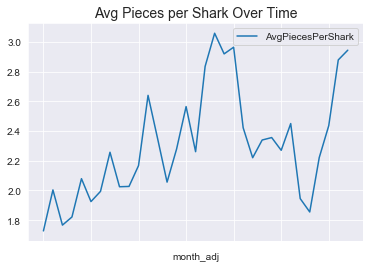

In [72]:
import matplotlib.pylab as plt 
%matplotlib inline

a1 = months.plot(x='month_adj', y='AvgPiecesPerShark');

plt.xticks(rotation = 45);
plt.title('Avg Pieces per Shark Over Time', size=14);

In [26]:
months_18 = df_2018[['month', 'AvgPiecesPerShark']].groupby(['month']).mean().reset_index()
month_lookup = pd.DataFrame({
       'id':['January','February','March','April','May','June','July','August','September','October','November','December'],
    'label':['01Jan','02Feb','03Mar','04Apr','05May','06Jun','07Jul','08Aug','09Sep','10Oct','11Nov', '12Dec']})

months_18 = months_18.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(by='month').reset_index().drop(
    columns=['index'])
months_18

month  AvgPiecesPerShark
0   01Jan           1.727731
1   02Feb           2.003720
2   03Mar           1.766807
3   04Apr           1.821561
4   05May           2.079497
5   06Jun           1.925210
6   07Jul           1.993915
7   08Aug           2.257423
8   09Sep           2.025132
9   10Oct           2.027311
10  11Nov           2.167560
11  12Dec           2.640476